In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#file_path = '/content/drive/MyDrive/Satellite_Imagery_Property_Valuation/data/raw/train(1)(train(1)).csv'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PROJECT_ROOT = "/content/drive/MyDrive/Satellite_Imagery_Property_Valuation"
import os
os.listdir(PROJECT_ROOT + "/data/raw")


['train(1)(train(1)).csv', 'test2(test(1)).csv']

In [ ]:
train_df = pd.read_csv(PROJECT_ROOT + "/data/raw/train(1)(train(1)).csv")
test_df = pd.read_csv(PROJECT_ROOT + "/data/raw/test2(test(1)).csv")

train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


## DATA CLEANING


In [ ]:
train_df.shape

(16209, 21)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [ ]:
train_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
train_df.duplicated().sum()

np.int64(0)

In [ ]:
#since data contains no missing values and no duplicates and no categorical variables our dataset is primarily
#we can also remove unimportant columns such as date as it do not have impact on target variable price


In [ ]:
train_df = train_df.drop(columns=['date'], errors='ignore')

## target variable fixing

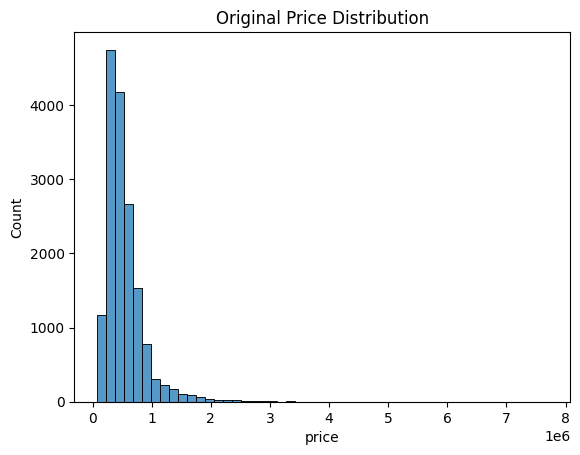

In [ ]:
sns.histplot(train_df['price'], bins=50)
plt.title("Original Price Distribution")
plt.show()

since the data is highly right skewed it needs to be transformed for better results required for regression


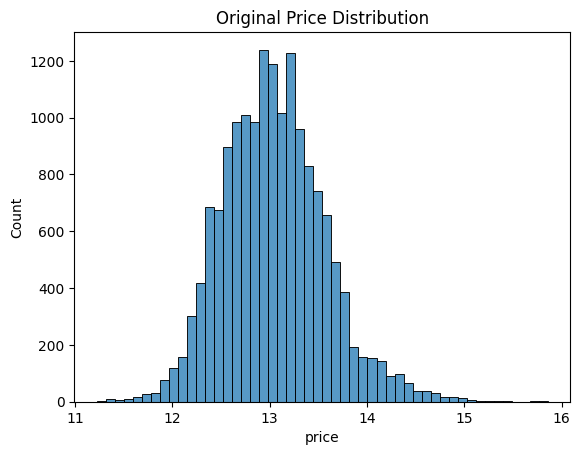

In [ ]:
train_df['price'] = np.log1p(train_df['price'])
sns.histplot(train_df['price'], bins=50)
plt.title("Original Price Distribution")
plt.show()

 now the price data is normalised for better price distribution

## Outlier Treatment

In [ ]:
q_low = train_df['price'].quantile(0.01)
q_high = train_df['price'].quantile(0.99)

train_df_new = train_df[(train_df['price'] >= q_low) & (train_df['price'] <= q_high)]
train_df_new.shape

(15883, 20)

here we have more cleaned dataset

## Exploratory Data Analysis

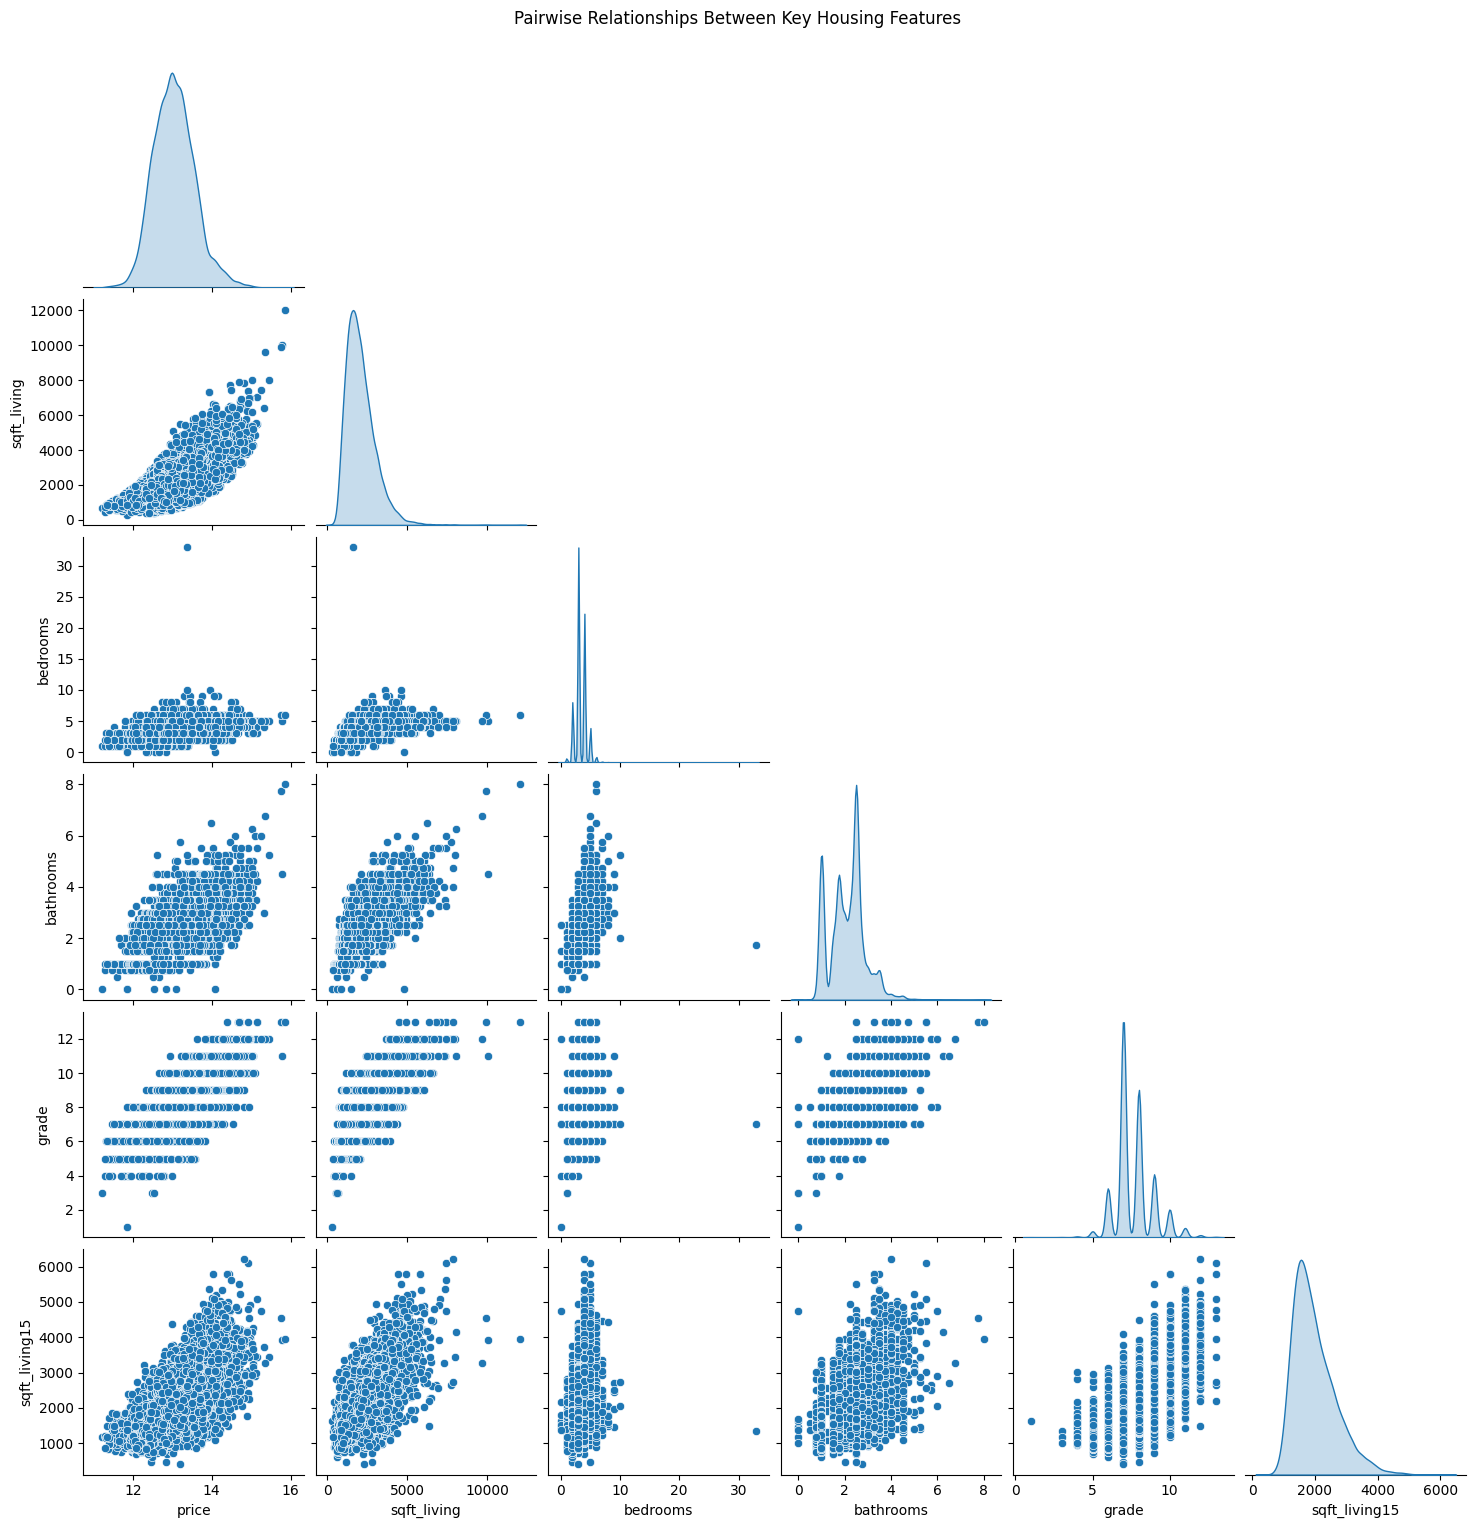

In [ ]:
features = [
    'price',
    'sqft_living',
    'bedrooms',
    'bathrooms',
    'grade',
    'sqft_living15'
]

df_subset = train_df[features]
sns.pairplot(
    df_subset,
    diag_kind='kde',
    corner=True
)
plt.suptitle("Pairwise Relationships Between Key Housing Features", y=1.02)
plt.show()

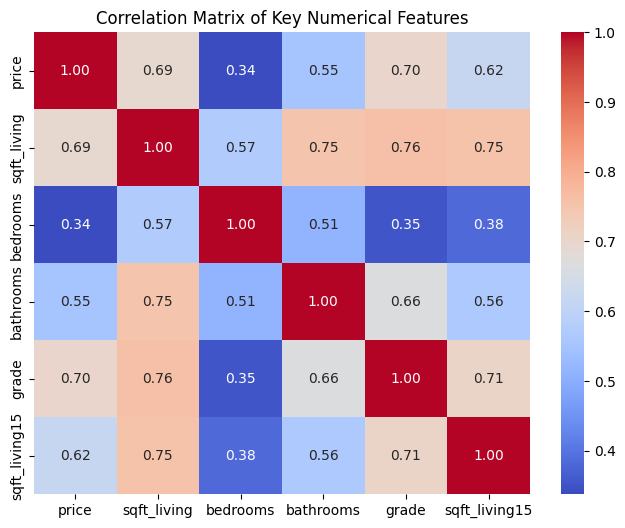

In [ ]:
plt.figure(figsize=(8,6))
corr = df_subset.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Matrix of Key Numerical Features")
plt.show()

### Bivariate analysis of these key factors and price

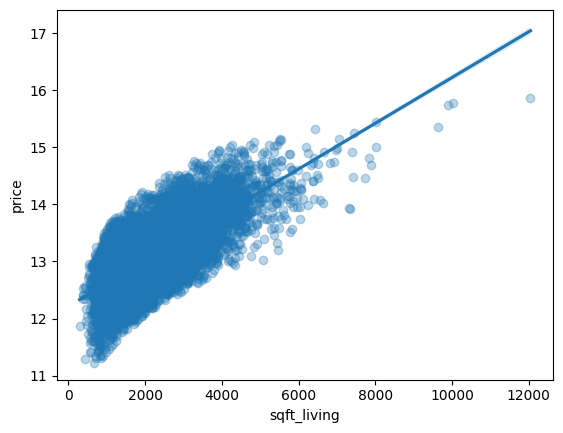

In [ ]:
#Effect of Living Area (sqft_living)
sns.regplot(x='sqft_living', y='price', data=train_df, scatter_kws={'alpha':0.3})
plt.show()

Strong positive relationship

Diminishing marginal returns after ~4000 sqft

Large homes vary widely in price which implies location & quality matter


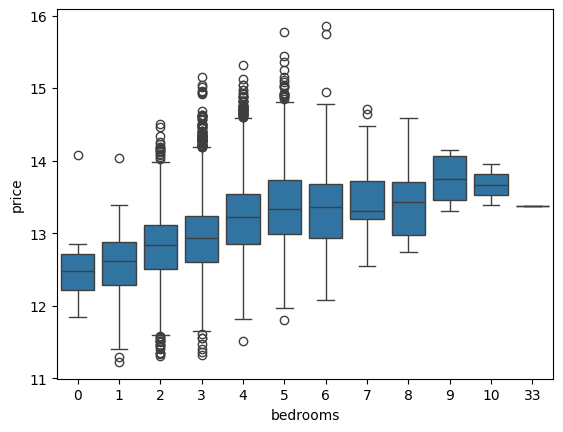

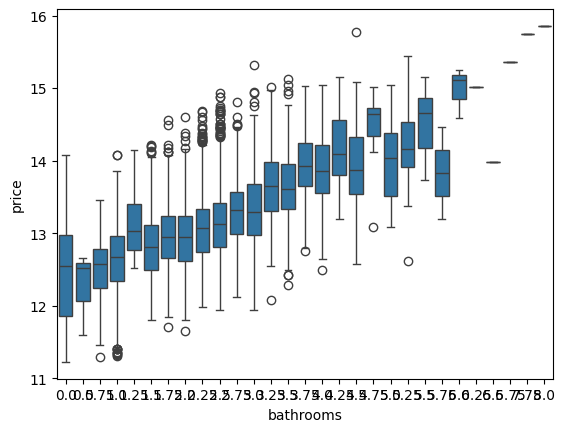

In [ ]:
#Effect of Bedrooms vs Bathrooms
#Bedrooms
sns.boxplot(x='bedrooms', y='price', data=train_df)
plt.show()

#Bathrooms
sns.boxplot(x='bathrooms', y='price', data=train_df)
plt.show()

Bedrooms show weak monotonic trend which means after a point, more bedrooms do not increase price significantly.

Bathrooms show clear upward shift in median price

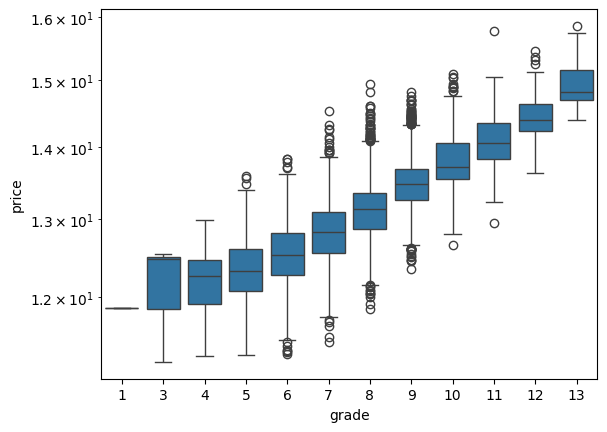

In [ ]:
#Effect of Construction Quality (grade)
sns.boxplot(x='grade', y='price', data=train_df)
plt.yscale("log")
plt.show()

Near-exponential increase in price with grade

High-grade homes exhibit larger variance

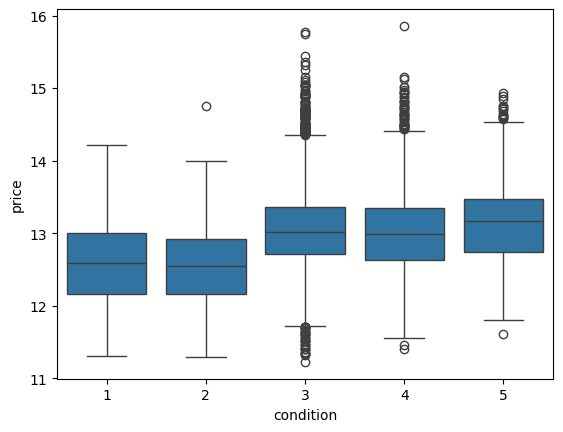

In [ ]:
#Effect of Property Condition (condition)
sns.boxplot(x='condition', y='price', data=train_df)
plt.show()

Moderate increase from poor to good condition

Limited variation across mid-range conditions

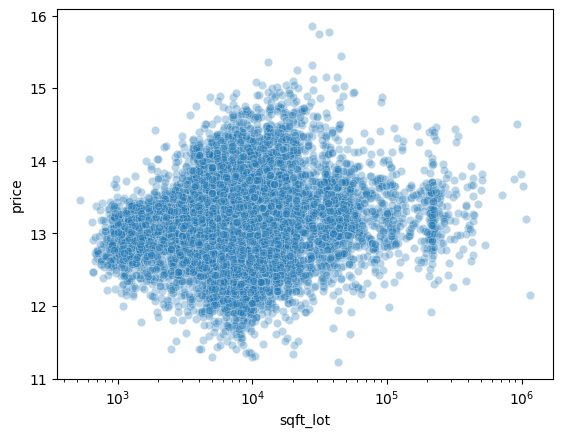

In [ ]:
#Effect of Lot Size (sqft_lot)
sns.scatterplot(x='sqft_lot', y='price', data=train_df, alpha=0.3)
plt.xscale("log")
plt.show()

Weak linear relationship

Large dispersion which is due to urban vs suburban effect

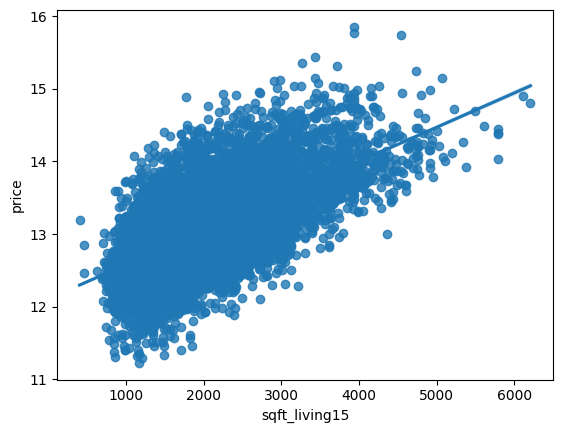

In [ ]:
#Effect of Neighborhood Context (sqft_living15)
sns.regplot(x='sqft_living15', y='price', data=train_df)
plt.show()

Strong positive correlation

Smooth trend shows neighborhood affluence signal

Neighborhood living standards strongly influence individual property valuation.

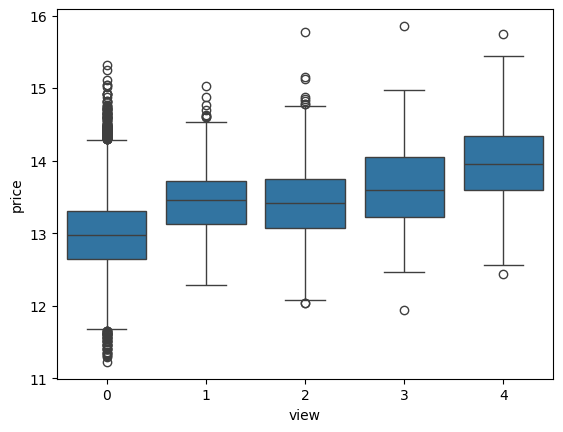

In [ ]:
#Effect of View Quality (view)
sns.boxplot(x='view', y='price', data=train_df)
plt.show()

Clear price premium for higher view ratings

Step-wise increase rather than continuous

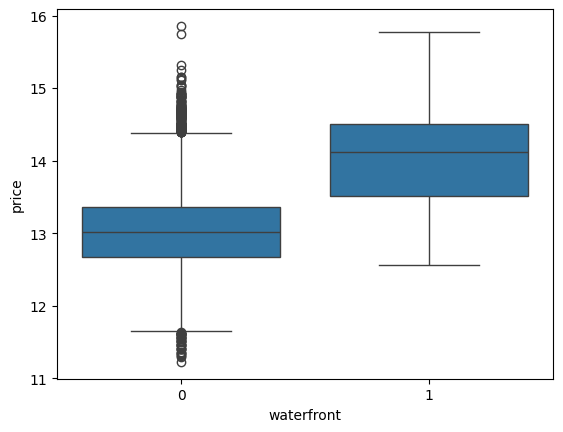

In [ ]:
#Effect of Waterfront (waterfront)
sns.boxplot(x='waterfront', y='price', data=train_df)
plt.show()

Waterfront homes show 2–3× median price

Distinct distribution separation

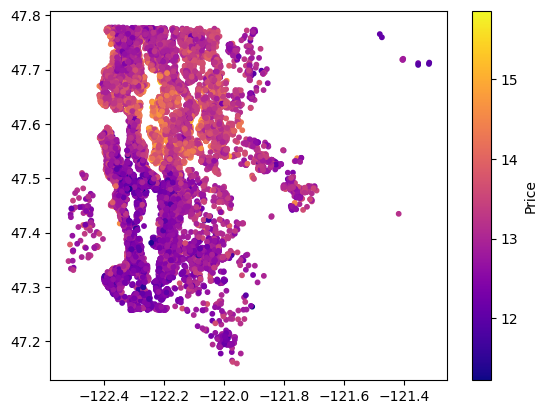

In [ ]:
#Geospatial Effect (Latitude & Longitude)
plt.scatter(train_df['long'], train_df['lat'], c=train_df['price'], cmap='plasma', s=10)
plt.colorbar(label='Price')
plt.show()

Strong spatial clustering of prices

High-price regions coincide with water bodies & urban centers

## Geospatial analysis

In [ ]:
#first lets have a clean image folder

In [ ]:
IMAGE_DIR = "/content/drive/MyDrive/Satellite_Imagery_Property_Valuation/data/images/satellite_images"

In [ ]:
train_df['image_path'] = train_df['id'].astype(str).apply(
    lambda x: os.path.join(IMAGE_DIR, f"{x}.png")
)
train_df['image_exists'] = train_df['image_path'].apply(os.path.exists)
train_df['image_exists'].value_counts()


,count
image_exists,
True,16209


In [ ]:
train_df = train_df[train_df['image_exists']].reset_index(drop=True)
train_df.drop(columns=['image_exists'], inplace=True)

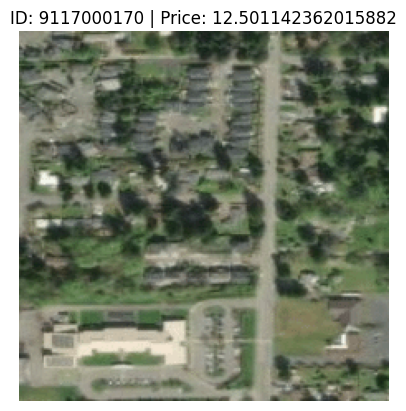

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(train_df['image_path'].iloc[0])
plt.imshow(img)
plt.axis('off')
plt.title(f"ID: {train_df['id'].iloc[0]} | Price: {train_df['price'].iloc[0]}")
plt.show()

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

In [ ]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cnn_model = models.resnet18(pretrained=True)
cnn_model.fc = torch.nn.Identity()   # remove final classification layer
cnn_model = cnn_model.to(device)
cnn_model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 139MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class SatelliteImageDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        img = self.transform(img)
        return img

In [ ]:
image_dataset = SatelliteImageDataset(
    train_df['image_path'].values,
    image_transform
)

image_loader = DataLoader(
    image_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

In [ ]:
image_embeddings = []

with torch.no_grad():
    for batch in tqdm(image_loader, desc="Extracting CNN features"):
        batch = batch.to(device)
        features = cnn_model(batch)          # (B, 512)
        image_embeddings.append(features.cpu().numpy())

image_embeddings = np.vstack(image_embeddings)

Extracting CNN features: 100%|██████████| 507/507 [51:11<00:00,  6.06s/it]


In [ ]:
image_embeddings.shape

(16209, 512)

In [40]:
train_df['cnn_features'] = list(image_embeddings)

In [43]:
np.save("/content/drive/MyDrive/Satellite_Imagery_Property_Valuation/data/cnn_image_features.npy", image_embeddings)
train_df.to_csv("/content/drive/MyDrive/Satellite_Imagery_Property_Valuation/data/train_with_cnn_features.csv", index=False)